In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ls

BT4211 Case 3 Assignment.pdf  QWE Inc._Data.xlsx
Case 3.ipynb


In [3]:
qwe_data = pd.read_excel("QWE Inc._Data.xlsx")

In [4]:
qwe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
cust_id                 6347 non-null int64
cust_age                6347 non-null int64
churn                   6347 non-null int64
chiscore_nov            6347 non-null int64
chiscore_nov_dec        6347 non-null int64
suppcase_nov            6347 non-null int64
suppcase_nov_dec        6347 non-null int64
avgspriority_nov        6347 non-null float64
avgspriority_nov_dec    6347 non-null float64
logins_nov_dec          6347 non-null int64
blogs_nov_dec           6347 non-null int64
views_nov_dec           6347 non-null int64
days_nov_dec            6347 non-null int64
dtypes: float64(2), int64(11)
memory usage: 644.7 KB


In [5]:
qwe_data.head(5)

,cust_id,cust_age,churn,chiscore_nov,chiscore_nov_dec,suppcase_nov,suppcase_nov_dec,avgspriority_nov,avgspriority_nov_dec,logins_nov_dec,blogs_nov_dec,views_nov_dec,days_nov_dec
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,4,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,5,57,0,43,-1,0,0,0.0,0.0,0,0,9,31


# Q1

/Users/apple/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


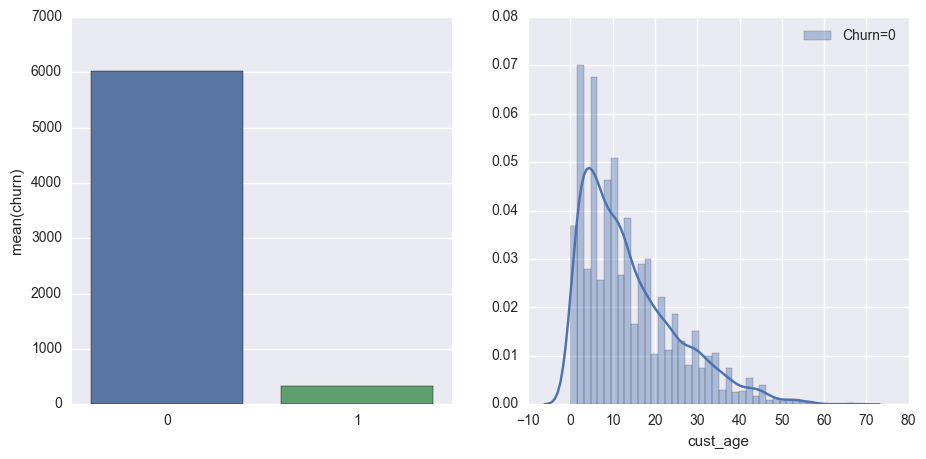

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(10.8, 5)
sns.barplot(x=qwe_data["churn"].value_counts().index, y=qwe_data["churn"].value_counts(), ax=ax[0])
sns.distplot(qwe_data["cust_age"], ax=ax[1], label="Churn=0", kde_kws={"label":""})

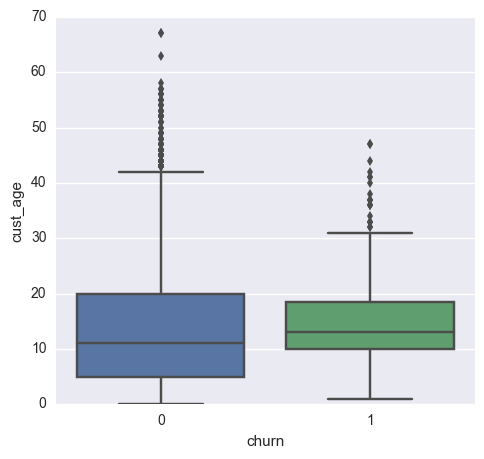

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(5.4, 5)
sns.boxplot(x="churn", y="cust_age", data=qwe_data)

# Q2 

In [8]:
from sklearn.linear_model import LogisticRegression
qwe_train_x = qwe_data.drop(["cust_id", "churn"], axis=1)
qwe_train_y = qwe_data["churn"]
lm = LogisticRegression()
lm.fit(qwe_train_x, qwe_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
def coef_df(lm, train):
    return pd.DataFrame(lm.coef_[0], train.columns, 
                        columns={"coef"}).sort_values("coef")
coef_df(lm, qwe_train_x)

,coef
suppcase_nov,-0.142187
avgspriority_nov_dec,-0.043287
chiscore_nov_dec,-0.010212
chiscore_nov,-0.004741
views_nov_dec,-0.000110
blogs_nov_dec,0.000275
logins_nov_dec,0.000280
avgspriority_nov,0.004805
cust_age,0.012203
days_nov_dec,0.016980


In [10]:
selected = pd.DataFrame([qwe_data.loc[671], qwe_data.loc[353], qwe_data.loc[5202]])
selected.set_index("cust_id", inplace=True)
prob = [lm.predict_proba(qwe_train_x.loc[selected.index])[0][1],
        lm.predict_proba(qwe_train_x.loc[selected.index])[1][1],
        lm.predict_proba(qwe_train_x.loc[selected.index])[2][1]]
selected["churn_prob"] = prob
selected

,cust_age,churn,chiscore_nov,chiscore_nov_dec,suppcase_nov,suppcase_nov_dec,avgspriority_nov,avgspriority_nov_dec,logins_nov_dec,blogs_nov_dec,views_nov_dec,days_nov_dec,churn_prob
cust_id,,,,,,,,,,,,,
672.0,16.0,0.0,148.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,85.0,2.0,0.040151
354.0,13.0,0.0,139.0,-29.0,0.0,0.0,0.0,0.0,-4.0,1.0,244.0,-1.0,0.049235
5203.0,4.0,0.0,37.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.017685


# Q3

In [11]:
qwe_data.loc[qwe_data["cust_age"] <= 6, "age_group"] = "0 - 6"
qwe_data.loc[(qwe_data["cust_age"] >= 6) & (qwe_data["cust_age"] <= 13), "age_group"] = "7 - 13"
qwe_data.loc[qwe_data["cust_age"] >= 14, "age_group"] = "14 +"
qwe_data["age_group"].value_counts()

14 +      2600
7 - 13    2078
0 - 6     1669
Name: age_group, dtype: int64

In [12]:
col_to_delete = ["cust_id", "churn", "age_group"]
qwe_train_x_0_6 = qwe_data[qwe_data["age_group"] == "0 - 6"].drop(col_to_delete, axis=1)
qwe_train_x_7_13 = qwe_data[qwe_data["age_group"] == "7 - 13"].drop(col_to_delete, axis=1)
qwe_train_x_14_plus = qwe_data[qwe_data["age_group"] == "14 +"].drop(col_to_delete, axis=1)
qwe_train_y_0_6 = qwe_data.loc[qwe_data["age_group"] == "0 - 6", "churn"]
qwe_train_y_7_13 = qwe_data.loc[qwe_data["age_group"] == "7 - 13", "churn"]
qwe_train_y_14_plus = qwe_data.loc[qwe_data["age_group"] == "14 +", "churn"]

In [13]:
lm_a, lm_b, lm_c = LogisticRegression(), LogisticRegression(), LogisticRegression()
lm_a.fit(qwe_train_x_0_6, qwe_train_y_0_6)
lm_b.fit(qwe_train_x_7_13, qwe_train_y_7_13)
lm_c.fit(qwe_train_x_14_plus, qwe_train_y_14_plus)
print(lm_a, "\n", lm_b, "\n", lm_c)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [14]:
coef_df(lm_a, qwe_train_x_0_6)

,coef
cust_age,-0.291467
avgspriority_nov_dec,-0.100329
chiscore_nov_dec,-0.039427
suppcase_nov,-0.018373
views_nov_dec,-0.000039
blogs_nov_dec,0.003032
logins_nov_dec,0.007211
chiscore_nov,0.008735
days_nov_dec,0.086501
suppcase_nov_dec,0.165650


In [15]:
coef_df(lm_b, qwe_train_x_7_13)

,coef
suppcase_nov,-0.252964
avgspriority_nov_dec,-0.045049
avgspriority_nov,-0.036028
blogs_nov_dec,-0.026124
chiscore_nov,-0.009968
chiscore_nov_dec,-0.003198
views_nov_dec,-0.000116
logins_nov_dec,0.002390
days_nov_dec,0.015228
cust_age,0.148297


In [16]:
coef_df(lm_c, qwe_train_x_14_plus)

,coef
suppcase_nov,-0.186076
cust_age,-0.036933
chiscore_nov,-0.012251
logins_nov_dec,-0.003804
days_nov_dec,-0.000944
views_nov_dec,-0.000133
chiscore_nov_dec,0.001245
avgspriority_nov_dec,0.017763
blogs_nov_dec,0.020171
avgspriority_nov,0.027573


In [17]:
selected_new = pd.DataFrame([qwe_data.loc[671], qwe_data.loc[353], qwe_data.loc[5202]])
selected_new.set_index("cust_id", inplace=True)
prob_new = [lm_a.predict_proba([qwe_train_x.loc[671]])[0][1],
        lm_b.predict_proba([qwe_train_x.loc[353]])[0][1],
        lm_c.predict_proba([qwe_train_x.loc[5202]])[0][1]]
selected_new["churn_prob_new"] = prob_new
selected_new

,cust_age,churn,chiscore_nov,chiscore_nov_dec,suppcase_nov,suppcase_nov_dec,avgspriority_nov,avgspriority_nov_dec,logins_nov_dec,blogs_nov_dec,views_nov_dec,days_nov_dec,age_group,churn_prob_new
cust_id,,,,,,,,,,,,,,
672,16,0,148,1,0,0,0.0,0.0,17,1,85,2,14 +,0.001070
354,13,0,139,-29,0,0,0.0,0.0,-4,1,244,-1,7 - 13,0.073036
5203,4,0,37,32,1,1,0.0,0.0,0,0,1,5,0 - 6,0.188957


In [18]:
pd.DataFrame([selected["churn_prob"], selected_new["churn_prob_new"]]).T

,churn_prob,churn_prob_new
cust_id,,
672.0,0.040151,0.001070
354.0,0.049235,0.073036
5203.0,0.017685,0.188957


# Q4

In [19]:
dummies = pd.get_dummies(qwe_data["age_group"])
qwe_data_new = pd.merge(qwe_data, dummies, left_index=True, right_index=True)
qwe_data_new.drop("age_group", axis=1, inplace=True)
qwe_data_new.head(5)

,cust_id,cust_age,churn,chiscore_nov,chiscore_nov_dec,suppcase_nov,suppcase_nov_dec,avgspriority_nov,avgspriority_nov_dec,logins_nov_dec,blogs_nov_dec,views_nov_dec,days_nov_dec,0 - 6,14 +,7 - 13
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31,0.0,1.0,0.0
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31,0.0,1.0,0.0
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31,0.0,1.0,0.0
3,4,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0,0.0,1.0,0.0
4,5,57,0,43,-1,0,0,0.0,0.0,0,0,9,31,0.0,1.0,0.0


In [20]:
lm_new = LogisticRegression()
qwe_new_train_x = qwe_data_new.drop(["cust_id", "churn"], axis=1)
qwe_new_train_y = qwe_data_new["churn"]

In [21]:
lm_new.fit(qwe_new_train_x, qwe_new_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
for key, item in qwe_data_new.iterrows():
    qwe_data_new.loc[key, "churn_prob"] = lm_new.predict_proba([qwe_new_train_x.loc[key]])[0][1]

In [23]:
qwe_data_new.set_index("cust_id", inplace=True)

In [24]:
prob_df = pd.DataFrame(qwe_data_new["churn_prob"])
prob_df[prob_df["churn_prob"] >= 0.2].sort_values("churn_prob", ascending=False)

,churn_prob
cust_id,
357,0.367534
929,0.293765
2287,0.249127
3604,0.232055
4680,0.226896
335,0.215897
3671,0.215326
4292,0.214742
3569,0.210897


In [25]:
from sklearn.metrics import roc_curve, auc

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(qwe_data_new["churn"], qwe_data_new["churn_prob"])
roc_auc = auc(false_positive_rate, true_positive_rate)

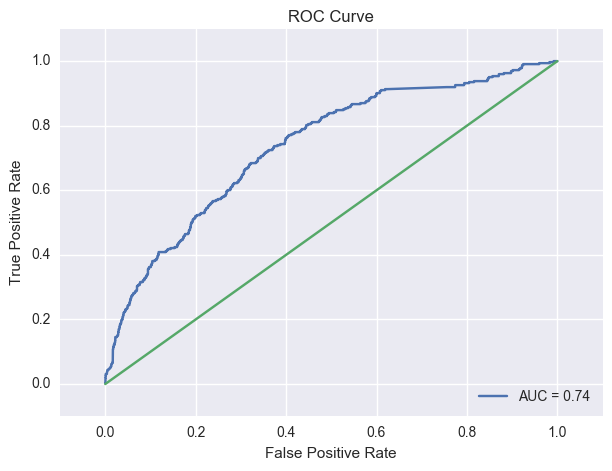

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate,
         label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1])
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')